In [2]:
#!/usr/bin/python3

import os
import subprocess
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib2tikz import save as tikz_save
from operator import itemgetter, attrgetter



The purpose of this script is to process AEP data logs, which first means understanding their format.

The CSV file sort of documents the format:

# Default Format
timestamp;;DIMM0;;;;;;;;;;;;;DIMM1;;;;;;;;;;;;;DIMM2;;;;;;;;;;;;;DIMM3;;;;;;;;;;;;;DIMM4;;;;;;;;;;;;;DIMM5;;;;;;;;;;;;;DIMM6;;;;;;;;;;;;;DIMM7;;;;;;;;;;;;;DIMM8;;;;;;;;;;;;;DIMM9;;;;;;;;;;;;;DIMM10;;;;;;;;;;;;;DIMM11;;;;;;;;;;;;;
epoch;timestamp;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops (derived);read_64B_ops_received;write_64B_ops_received;ddrt_read_ops;ddrt_write_ops;block_read_ops;block_write_ops;

I say "sort of" because the mapping isn't entirely obvious to me (yet).

There appear to be 12 items per entry, plus a timestamp:

```
['1553765033', '2195123058', 
'100096', '1591040', '0.00', '0.00', '0.00', '391', '6215', '26424', '24860', '101', '33', '0', '0', 
'100096', '1590784', '0.00', '0.00', '0.00', '391', '6214', '26420', '24856', '101', '33', '0', '0', 
'100352', '1590528', '0.00', '0.00', '0.00', '392', '6213', '26420', '24852', '101', '33', '0', '0', 
'100096',  '1591040', '0.00', '0.00', '0.00', '391', '6215', '26424', '24860', '101', '33', '0', '0', 
'100352', '1591040', '0.00', '0.00', '0.00', '392', '6215', '26428', '24860', '101', '33', '0', '0', 
'100352', '1591040', '0.00', '0.00', '0.00', '392', '6215', '26428', '24860', '101', '33', '0', '0', 
'117917696', '1920256', '0.21', '0.00', '0.00', '460616', '7501', '1872468', '30004', '586192', '2502', '0', '0', 
'117024256', '1906432', '0.22', '0.00', '0.00', '457126', '7447', '1858292', '29788', '583593', '2205', '0', '0',
'117085952', '1877504', '0.22', '0.00', '0.00', '457367', '7334', '1858804', '29336', '583051', '1931', '0', '0',
'115381760', '1891328', '0.22', '0.00', '0.00', '450710', '7388', '1832392', '29552', '575008', '2082', '0', '0', 
'115853824', '1928704', '0.22', '0.00', '0.00', '452554', '7534', '1840352', '30136', '577958', '2530', '0', '0', 
'114737408', '1877760', '0.22', '0.00', '0.00', '448193', '7335', '1822112', '29340', '574502', '1964', '0', '0', '']
```

So there are ~three~ two "lead-in fields", then a timestamp, then 12 measurements, then we repeat 11 more times, then end with... something.  Each entry appears to correspond to one of the DIMMs (versus each entry being a collection of data for **one** DIMM.)

Update: using the **script** file (that calls gnuplot) it looks like there are just 11 things being sampled, so I need to reformulate my analysis.  Part of the issue here is that I'm **only** interested in DIMM 6-11 (node 1, the striped set), which is why I want to ignore DIMM 0-5.  Plus, gnuplot dies on me (core dumps) and I'd rather not spend a lot of time debugging this (or "I'll have to figure out the details of the data format, why not convert this to a workflow that **I** understand.)





In [96]:
class AEPTestData:
    data_labels = ('bytes read', 'bytes written', 'read hit ratio',
        'write hit ratio', 'wdb merge percent',
        'sxp read ops', 'sxp write ops',
        'read 64B ops received', 'write 64B ops received',
        'ddrt read ops', 'ddrt write ops')    
    
    
    def __init__(self,csv_file=None):
        self.csv_data = {l : {} for l in AEPTestData.data_labels}
        self.csv_file = csv_file
        self.timestamps = []
        if csv_file is None: self.csv_data = {}
        else: self.load_data(self.csv_file)
        
    
    @staticmethod
    def is_number(s):
        """True if the passed-in string is a number"""
        return s.replace('.','',1).isdigit()

    @staticmethod
    def convert_number(s):
        assert type(s) is str
        if s.isdigit(): return int(s)
        if is_number(s): return float(s)
        return None # should this assert?


    def __validate_data__(self):
        assert self.csv_file is not None
        for data_label in AEPTestData.data_labels:
            for dimm_label in self.csv_data[data_label]:
                assert len(self.csv_data[data_label][dimm_label]) == len(self.timestamps) # sanity


    
    def load_data(self,csv_file):
        print_length = True
        self.csv_file = csv_file
        with open(self.csv_file, newline='') as fd:
            reader = csv.reader(fd, delimiter=';', quoting=csv.QUOTE_NONE)
            for row in reader:
                if len(row) is 1: continue # ignore the comment lines
                if not row[0].isdigit(): continue # ignore the label rows
                self.timestamps.append(row[2])
                offset = 3
                if print_length:
                    print(len(row))
                    print(row)
                    print_length = False
                dimm_label_index = 0
                while offset + len(AEPTestData.data_labels) < len(row):
                    dimm_label_index = dimm_label_index + 1
                    dimm_label = 'DIMM{}'.format(dimm_label_index)
                    for data_label in AEPTestData.data_labels:          
                        if dimm_label not in self.csv_data[data_label]: self.csv_data[data_label][dimm_label] = []
                        assert self.is_number(row[offset]), '{} is not numeric (row is {})'.format(row[offset], row)
                        self.csv_data[data_label][dimm_label].append(row[offset])
                        offset = offset + 1
                    offset = offset + 1
        self.__validate_data__()
        return self
    
    

In [97]:
data_dir = '.'
#csv_list = [x for x in os.listdir(data_dir) if x.endswith('.csv')]
csv_list = ['aep-2mm_time-2019_03_28__05_23_07.csv']
test_data = {}

for csv_file in csv_list:
    test_data[csv_file] = AEPTestData(csv_file=csv_file)



159
['1553765002', '2195118886', '99328', '1578240', '0.00', '0.00', '0.00', '388', '6165', '26212', '24660', '102', '33', '0', '0', '99584', '1579520', '0.00', '0.00', '0.00', '389', '6170', '26236', '24680', '101', '33', '0', '0', '99840', '1583104', '0.00', '0.00', '0.00', '390', '6184', '26296', '24736', '101', '33', '0', '0', '99840', '1584640', '0.00', '0.00', '0.00', '390', '6190', '26320', '24760', '101', '33', '0', '0', '99840', '1585408', '0.00', '0.00', '0.00', '390', '6193', '26332', '24772', '101', '33', '0', '0', '99840', '1585920', '0.00', '0.00', '0.00', '390', '6195', '26340', '24780', '101', '33', '0', '0', '190720768', '1787136', '0.12', '0.00', '0.00', '745003', '6981', '3007936', '27924', '851133', '1023', '0', '0', '186422016', '1772288', '0.13', '0.00', '0.00', '728211', '6923', '2940536', '27692', '838858', '883', '0', '0', '187593472', '1783040', '0.13', '0.00', '0.00', '732787', '6965', '2959008', '27860', '838546', '990', '0', '0', '186065408', '1775872', '0.

**Note**: the timestamps recur in the data but seem to be identical (the original script seems to assume they are identical).

# Now we're on to plotting

In [90]:
class AEPTestPlot:
    
    def __init__(self, test_data):
        self.test_data = test_data
        self.plot_title = 'Untitled Plot'
        
    def set_plot_title(self, title):
        self.plot_title = title
        
    
    def plot(self, test, output=None, output_dir='.', show=False):
        #print(test, self.test_data.csv_data)
        print(test)
        for td in self.test_data.csv_data: print(td)
        assert test in self.test_data.csv_data
        plt.style.use("ggplot")
        plt.title(self.plot_title)
        plt.grid(True)
        for dimm in self.test_data.csv_data[test]:
            print(self.test_data.timestamps)
            print(self.test_data.csv_data[test][dimm])
            plt.plot(self.test_data.timestamps, self.test_data.csv_data[test][dimm], label=dimm)
            break
        plt.show()
        # TODO: add the stuff to save it
    


bytes read
bytes read
bytes written
read hit ratio
write hit ratio
wdb merge percent
sxp read ops
sxp write ops
read 64B ops received
write 64B ops received
ddrt read ops
ddrt write ops
['99328', '101888', '100352', '100096', '100352', '102144', '100352', '100096', '100352', '100864', '100864', '100352', '100864', '101120', '100864', '100096', '103424', '100864', '100352', '100096', '100352', '100096', '100096', '100352', '100096', '101120', '100096', '101376', '100096', '100096', '100352', '100096']
['1578240', '1591808', '1591040', '1590784', '1591040', '1592064', '1591040', '1591040', '1590784', '1591552', '1591552', '1590784', '1591552', '1591552', '1591552', '1590784', '1592320', '1591808', '1590784', '1591040', '1591040', '1590784', '1591040', '1591552', '1590784', '1591296', '1591040', '1591808', '1590784', '1591040', '1591040', '1591040']


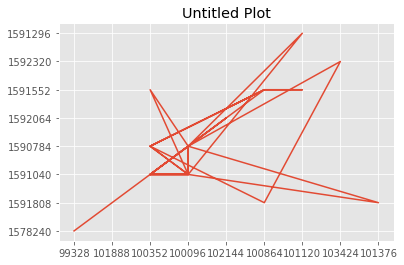

In [93]:
tp = AEPTestPlot(test_data[csv_file])
tp.plot(AEPTestData.data_labels[0])